In [125]:
import numpy as np 
import pandas as pd

In [126]:
data = pd.read_csv("Cellphone.csv")
data.head(5)

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [127]:
data.shape

(161, 14)

**drop raws that includes null values**

In [128]:
data = data.dropna()
data.shape

(161, 14)

In [129]:
data["ram"].value_counts()

1.000    36
2.000    34
3.000    27
4.000    21
0.512    12
6.000    12
0.004     6
1.500     5
0.008     2
0.032     2
0.000     2
0.128     2
Name: ram, dtype: int64

In [130]:
def ram(i):
        if i < 1 :
            return 1

        elif i == 2.5:
            return 3
        
        else:
            return i+1

data["ram"] = data["ram"].apply(ram)

### **check for outliers**

In [131]:
import matplotlib.pyplot as plt 

<function matplotlib.pyplot.show(close=None, block=None)>

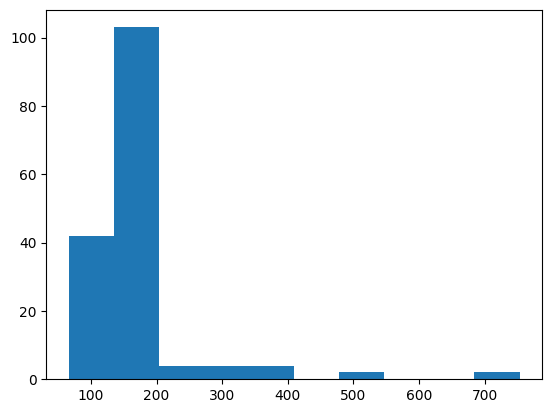

In [132]:
plt.hist(data["weight"])
plt.show

In [133]:
def weight(i):
        if i > 400 :
            return 40
            
        else:
            return i / 10

data["weight"] = data["weight"].apply(weight)

In [134]:
data["thickness"].describe()

count    161.000000
mean       8.921739
std        2.192564
min        5.100000
25%        7.600000
50%        8.400000
75%        9.800000
max       18.500000
Name: thickness, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

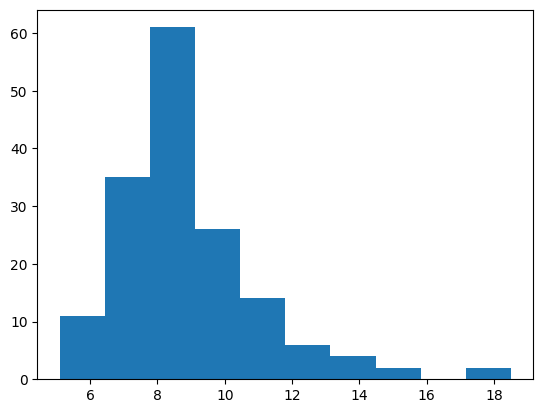

In [135]:
plt.hist(data["thickness"])
plt.show

In [136]:
def thickness(i):
        if i > 12 :
            return 12
            
        else:
            return i 

data["thickness"] = data["thickness"].apply(thickness)

**Scale the battery values**

In [137]:
def battery(i):
        i = i/1000
        return i

data["battery"] = data["battery"].apply(battery)
data["ppi"] = data["ppi"].apply(battery)

In [138]:
data.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,13.50,5.2,0.424,8,1.35,16.0,4.0,13.00,8.0,2.61,7.4
1,880,1749,10,12.50,4.0,0.233,2,1.30,4.0,2.0,3.15,0.0,1.70,9.9
2,40,1916,10,11.00,4.7,0.312,4,1.20,8.0,2.5,13.00,5.0,2.00,7.6
3,99,1315,11,11.85,4.0,0.233,2,1.30,4.0,1.0,3.15,0.0,1.40,11.0
4,880,1749,11,12.50,4.0,0.233,2,1.30,4.0,2.0,3.15,0.0,1.70,9.9


In [139]:
data = data.drop("Product_id",axis=1)
data.head()

,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,2357,10,13.50,5.2,0.424,8,1.35,16.0,4.0,13.00,8.0,2.61,7.4
1,1749,10,12.50,4.0,0.233,2,1.30,4.0,2.0,3.15,0.0,1.70,9.9
2,1916,10,11.00,4.7,0.312,4,1.20,8.0,2.5,13.00,5.0,2.00,7.6
3,1315,11,11.85,4.0,0.233,2,1.30,4.0,1.0,3.15,0.0,1.40,11.0
4,1749,11,12.50,4.0,0.233,2,1.30,4.0,2.0,3.15,0.0,1.70,9.9


In [140]:
X = data.drop("Price",axis=1)
Y = data["Price"]

In [141]:
from sklearn.model_selection import  train_test_split

In [142]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.1)

In [143]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import  LinearRegression

In [144]:
svr = SVR()
dr =  DecisionTreeRegressor()
rf = RandomForestRegressor()
lr = LinearRegression()

def model_acc(model):
    model.fit(X_train,Y_train)
    acc = model.score(X_test,Y_test)
    print("Score",model ,":" , acc*100)

model_acc(svr)
model_acc(lr)
model_acc(dr)
model_acc(rf)

Score SVR() : -5.5172855538212495
Score LinearRegression() : 94.9131925012794
Score DecisionTreeRegressor() : 100.0
Score RandomForestRegressor() : 98.59422302522147


**DECISION TREE REGRESSIOR GOT BEST ACCURACY**

In [145]:
from sklearn.model_selection import GridSearchCV

parameters = {"criterion":["squared_error", "friedman_mse", "absolute_error", "poisson"], "max_depth":[10, 20, 30]}

grid_obj = GridSearchCV(estimator=dr,param_grid=parameters)
grid_obj.fit(X_train,Y_train)
print(grid_obj.best_params_)

{'criterion': 'friedman_mse', 'max_depth': 10}


In [147]:
model = DecisionTreeRegressor(criterion ="poisson", max_depth=30) 
model.fit(X_train,Y_train)
pre = model.predict(X_test)



In [148]:
print(pre)

[1357. 1749. 2258. 2491. 2744. 2087. 2714. 2685. 1522. 3551. 2466. 3837.
 2392. 3005. 2323.  705. 1843.]
